# Predicting Titanic Survival : A Comparative Analysis of ML Algorithms
*Team Names :* 

Amr Khaled Mohamed Hassan - 2206159

Loay Salah AbdelAzeem - 2206155 

Omar Momen Ahmed - 2206157

Mickel Wassef Riad - 22010449

Abdelrahman Jayasundara Malavi - 2206147

Adham Mohamed Elsayed - 2206132

# Data Exploration and Preprocessing

In [1]:
import numpy as np
from scipy.stats._mstats_basic import winsorize
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def preprocess(input, output):
    df = pd.read_csv(input)
    df.drop(['name', 'cabin', 'ticket', 'embarked'], axis=1, inplace=True)
    df['sex'] = df['sex'].map({'male': 0, 'female': 1})

    # Handling missing values
    print(df.isnull().sum())

    # Impute missing values for numerical variables
    df['age'].fillna(df['age'].median(), inplace=True)
    df.dropna(subset=['fare'], inplace=True)
    # Encode categorical variables

    # Remove outliers using Winsorization
    df['age'] = winsorize(df['age'], limits=[0.05, 0.05])
    df.dropna(subset=['age'], inplace=True)
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    # Compute the correlation matrix using numeric columns only
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()

    print(df.isnull().sum())

    df.to_csv(output, index=False)


preprocess("titanic.csv", "titanic_preprocessed.csv")
preprocess("test.csv", "titanic_test_preprocessed.csv")

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
survived      0
dtype: int64
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
survived    0
dtype: int64
pclass    0
sex       0
age       1
sibsp     0
parch     0
fare      0
dtype: int64
pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
dtype: int64


C:\Users\kimo store\AppData\Local\Temp\ipykernel_5652\413866952.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\kimo store\AppData\Local\Temp\ipykernel_5652\413866952.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

# K-Nearest Neighbors (KNN)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed dataset
data = pd.read_csv("titanic_preprocessed.csv")

# Splitting the data into features (X) and target variable (y)
X = data.drop('survived', axis=1)
y = data['survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=5 (you can experiment with different values of k)
knn = KNeighborsClassifier(n_neighbors=17)

# Train the KNN model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("===============================================================================================================")

# Load the testing dataset
test_data = pd.read_csv("titanic_test_preprocessed.csv")

# Make predictions on the testing set
y_pred_final = knn.predict(test_data)

prediction_csv = pd.read_csv("test.csv")

# Add the predicted 'survived' column to the testing dataset
prediction_csv['survived'] = y_pred_final

# Save the updated testing dataset with predictions to a new CSV file
prediction_csv.to_csv("KNN_Predictions.csv", index=False)

# Display the first few rows of the updated testing dataset
# accuracy_test = accuracy_score(test_data, y_pred_final)
# print("Accuracy on Testing Dataset:", accuracy_test)
print(prediction_csv.to_string())

Accuracy: 0.7938931297709924
    pclass                                                     name     sex   age  sibsp  parch            ticket     fare cabin embarked  survived
0        3                                         Kelly, Mr. James    male  34.5      0      0            330911   7.8292   NaN        Q       0.0
1        3                         Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0            363272   7.0000   NaN        S       0.0
2        2                                Myles, Mr. Thomas Francis    male  62.0      0      0            240276   9.6875   NaN        Q       0.0
3        3                                         Wirz, Mr. Albert    male  27.0      0      0            315154   8.6625   NaN        S       0.0
4        3             Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1           3101298  12.2875   NaN        S       0.0
5        3                               Svensson, Mr. Johan Cervin    male  14.0  

# Naive Bayes

Accuracy
Test: 77.16%
Train: 77.68% 

Precision
Test: 0.7083333333333334
Train: 0.7102137767220903 

Recall
Test: 0.68
Train: 0.7035294117647058 

F1 Score
Test: 0.6938775510204083
Train: 0.706855791962175


c:\Users\kimo store\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


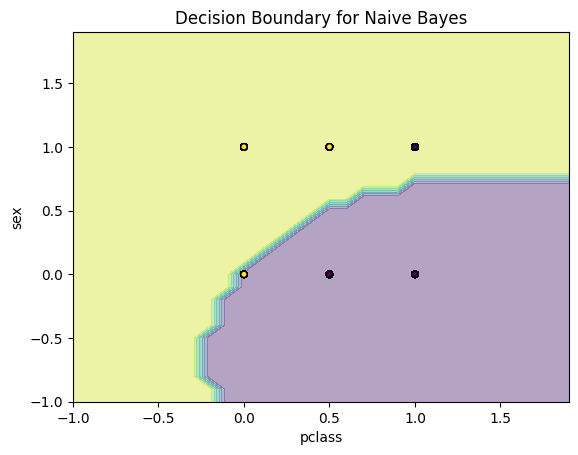


     pclass                                                     name     sex   age  sibsp  parch            ticket     fare cabin embarked  survived
0        3                                         Kelly, Mr. James    male  34.5      0      0            330911   7.8292   NaN        Q       0.0
1        3                         Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0            363272   7.0000   NaN        S       0.0
2        2                                Myles, Mr. Thomas Francis    male  62.0      0      0            240276   9.6875   NaN        Q       0.0
3        3                                         Wirz, Mr. Albert    male  27.0      0      0            315154   8.6625   NaN        S       0.0
4        3             Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1           3101298  12.2875   NaN        S       0.0
5        3                               Svensson, Mr. Johan Cervin    male  14.0      0      0              7

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
from sklearn.naive_bayes import GaussianNB


def train(dataframe, classifier):
    # Split data into features and labels
    X = dataframe.drop(['survived'], axis=1)  # Features
    y = dataframe['survived']  # Labels

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

    # Initialize Gaussian Naive Bayes classifier
    nb_classifier = classifier

    # Train the classifier
    nb_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred_test = nb_classifier.predict(X_test)
    y_pred_train = nb_classifier.predict(X_train)

    # Calculate accuracy
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # Calculate precision
    precision_test = precision_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)

    # Calculate recall
    recall_test = recall_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    # Calculate F1 score
    f1_test = f1_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)

    print("Accuracy")
    print("Test: {:.2f}%".format(accuracy_test * 100))
    print("Train: {:.2f}%".format(accuracy_train * 100), '\n')
    print("Precision")
    print("Test:", precision_test)
    print("Train:", precision_train, '\n')
    print("Recall")
    print("Test:", recall_test)
    print("Train:", recall_train, '\n')
    print("F1 Score")
    print("Test:", f1_test)
    print("Train:", f1_train)
    plot_decision_boundary(nb_classifier, X_train, y_train)


def plot_decision_boundary(classifier, X, y):
    # Define ranges to plot decision boundary
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict class labels for each point in the grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(
        xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('pclass')
    plt.ylabel('sex')
    plt.title('Decision Boundary for Naive Bayes')
    plt.show()


def prediction(dataframe, classifier):
    nb_classifier = classifier
    predicts = nb_classifier.predict(dataframe)
    return predicts


if __name__ == '__main__':
    # Load the dataframes ------------------------------
    df = pd.read_csv("titanic_preprocessed.csv")
    df_predict = pd.read_csv("titanic_test_preprocessed.csv")
    df_output = pd.read_csv("test.csv")
    # Load the classifier ------------------------------
    naive_bayes_classifier = GaussianNB()
    # Start the training -------------------------------
    train(df, naive_bayes_classifier)
    # Start the Predicting -----------------------------
    predictions = prediction(df_predict, naive_bayes_classifier)
    # Merge the predictions with the original file -----
    df_output['survived'] = predictions
    print("\n", df_output.to_string())
    df_output.to_csv('Naive_Bayes_Predictions.csv')


# Support Vector Machine (SVM)

Training Accuracy: 78.68% 

Test Accuracy: 75.19% 

Training Precision Score: 72.92% 

Test Precision Score: 72.04% 

Training Recall Score: 69.04% 

Test Recall Score: 63.21% 

Training F1 Score: 70.93% 

Test F1 Score: 67.34% 

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} 

Best Score: 81.45% 

Test Accuracy (Tuned Model): 77.86% 

Test Precision Score (Tuned Model): 76.67% 

Test Recall Score (Tuned Model): 65.09% 

Test F1 Score (Tuned Model): 70.41% 

    pclass                                                     name     sex   age  sibsp  parch            ticket     fare cabin embarked  survived
0        3                                         Kelly, Mr. James    male  34.5      0      0            330911   7.8292   NaN        Q       0.0
1        3                         Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0            363272   7.0000   NaN        S       0.0
2        2                                Myles, Mr. Thomas Francis    male  6

c:\Users\kimo store\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


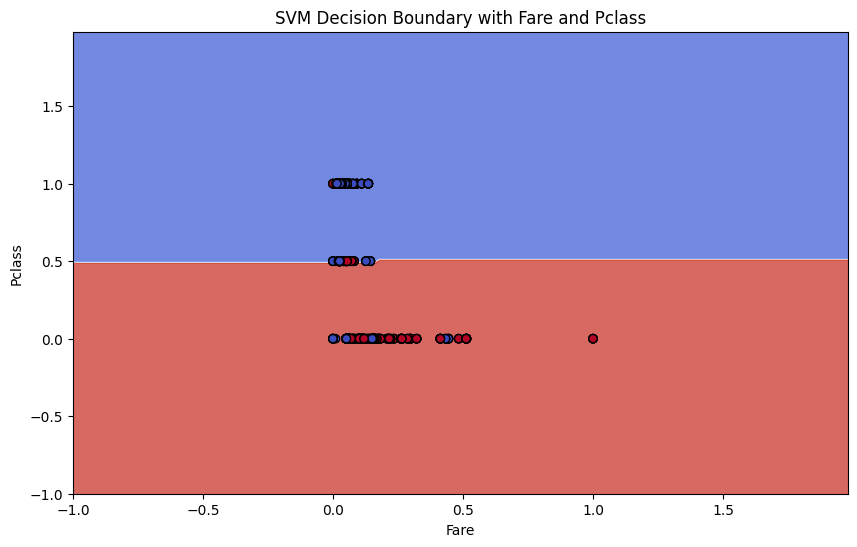

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv("titanic_preprocessed.csv")

# Step 4: Split the data into features and target variables
X = df.drop(['survived'], axis=1)
y = df['survived']

# Step 5: Train an SVM classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Step 6: Evaluate the model
train_accuracy = accuracy_score(y_train, svm.predict(X_train))
test_accuracy = accuracy_score(y_test, svm.predict(X_test))
train_f1 = f1_score(y_train, svm.predict(X_train))
test_f1 = f1_score(y_test, svm.predict(X_test))
train_precision = precision_score(y_train, svm.predict(X_train))
test_precision = precision_score(y_test, svm.predict(X_test))
train_recall = recall_score(y_train, svm.predict(X_train))
test_recall = recall_score(y_test, svm.predict(X_test))

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100), '\n')
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100), '\n')
print("Training Precision Score: {:.2f}%".format(train_precision * 100), '\n')
print("Test Precision Score: {:.2f}%".format(test_precision * 100), '\n')
print("Training Recall Score: {:.2f}%".format(train_recall * 100), '\n')
print("Test Recall Score: {:.2f}%".format(test_recall * 100), '\n')
print("Training F1 Score: {:.2f}%".format(train_f1 * 100), '\n')
print("Test F1 Score: {:.2f}%".format(test_f1 * 100), '\n')

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params,'\n')
print("Best Score: {:.2f}%".format(best_score * 100),'\n')

# Use the best estimator to make predictions
best_svm = grid_search.best_estimator_
test_accuracy_tuned = accuracy_score(y_test, best_svm.predict(X_test))
test_f1_tuned = f1_score(y_test, best_svm.predict(X_test))
test_precision_tuned = precision_score(y_test, best_svm.predict(X_test))
test_recall_tuned = recall_score(y_test, best_svm.predict(X_test))

print("Test Accuracy (Tuned Model): {:.2f}%".format(test_accuracy_tuned * 100),'\n')
print("Test Precision Score (Tuned Model): {:.2f}%".format(test_precision_tuned * 100),'\n')
print("Test Recall Score (Tuned Model): {:.2f}%".format(test_recall_tuned * 100),'\n')
print("Test F1 Score (Tuned Model): {:.2f}%".format(test_f1_tuned * 100),'\n')

df_test = pd.read_csv("titanic_test_preprocessed.csv")

# Step 4: Use the trained model to make predictions
predictions = best_svm.predict(df_test)

df_output = pd.read_csv("test.csv")
df_output["survived"] = predictions
df_output.to_csv("SVM_Predictions.csv")
print(df_output.to_string())

# Select features "fare" and "pclass" and target variable "survived"
X = df[['fare', 'pclass']]
y = df['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate the model
train_accuracy = svm.score(X_train, y_train)
test_accuracy = svm.score(X_test, y_test)

print("Train: {:.2f}%".format(train_accuracy * 100), '\n')
print("Test: {:.2f}%".format(test_accuracy * 100), '\n')

# Create a mesh grid for plotting the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X['fare'].min() - 1, X['fare'].max() + 1
y_min, y_max = X['pclass'].min() - 1, X['pclass'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X['fare'], X['pclass'], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.title('SVM Decision Boundary with Fare and Pclass')
plt.show()

# Artificial Neural Networks (ANN)

c:\Users\kimo store\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6413 - loss: 0.6605 - val_accuracy: 0.7762 - val_loss: 0.5683
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7307 - loss: 0.5758 - val_accuracy: 0.8143 - val_loss: 0.4842
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7653 - loss: 0.5285 - val_accuracy: 0.8000 - val_loss: 0.4655
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - loss: 0.4991 - val_accuracy: 0.8000 - val_loss: 0.4561
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7786 - loss: 0.4974 - val_accuracy: 0.8095 - val_loss: 0.4479
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7705 - loss: 0.5105 - val_accuracy: 0.8143 - val_loss: 0.4462
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7958 - loss: 0.4848 - val_accuracy: 0.8095 - val_loss: 0.4422
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7757 - loss: 0.4794 - val_accuracy: 0.8048 - val_loss:

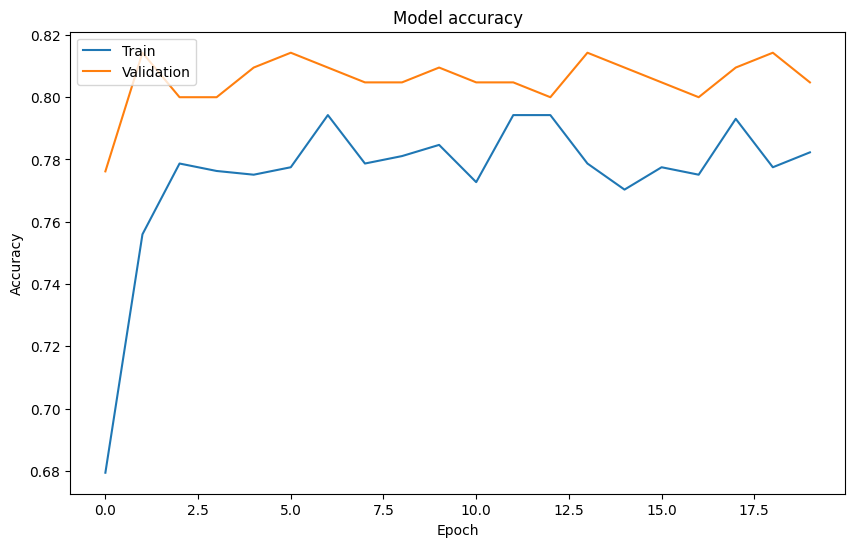

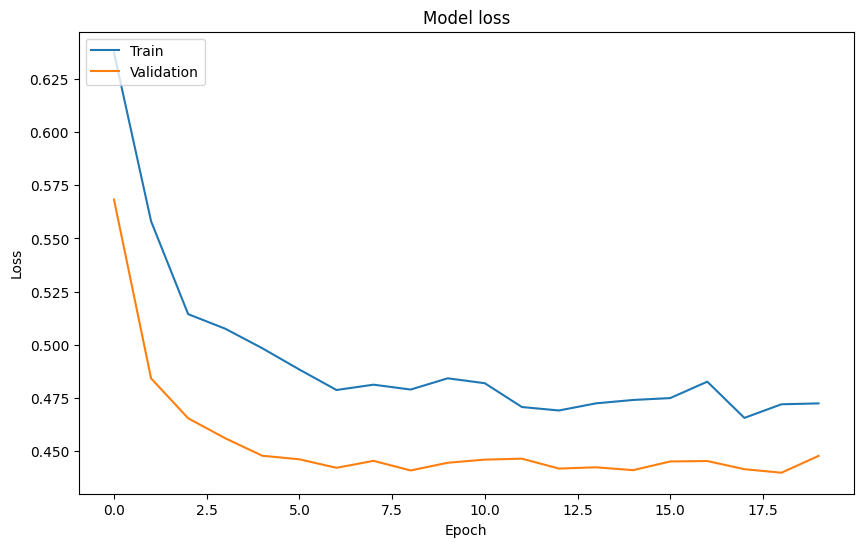

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

     pclass                                                     name     sex   age  sibsp  parch            ticket     fare cabin embarked  survived
0        3                                         Kelly, Mr. James    male  34.5      0      0            330911   7.8292   NaN        Q         0
1        3                         Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0            363272   7.0000   NaN        S         0
2        2                                Myles, Mr. Thomas Francis    male  62.0      0      0            240276   9.6875   NaN        Q         0
3        3                                         Wirz, Mr. Albert    male  27.0      0      0            315154   8.6625   NaN        S         0
4        3             Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1           3101298  12.2875   NaN        S         1
5        3                               Svensson, Mr. Johan Cervin    m

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats.mstats import winsorize
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

class ANNModel:
    def __init__(self, df, features, target):
        self.df = df
        self.features = features
        self.target = target
        self.scaler_mm = MinMaxScaler()
        self.model = None

    def preprocess_data(self):
        X = self.df[self.features]
        y = self.df[self.target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
        X_train_scaled = self.scaler_mm.fit_transform(X_train)
        X_test_scaled = self.scaler_mm.transform(X_test)
        return X_train_scaled, X_test_scaled, y_train, y_test

    def build_model(self):
        self.model = Sequential()
        self.model.add(Dense(32, input_dim=len(self.features), activation='relu'))
        self.model.add(Dense(64, activation='relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def train_model(self, X_train, y_train, epochs=20, batch_size=32):
        self.history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

    def evaluate_model(self, X_test, y_test):
        y_pred_test = (self.model.predict(X_test) > 0.5).astype("int32")
        accuracy = accuracy_score(y_test, y_pred_test)
        precision = precision_score(y_test, y_pred_test)
        recall = recall_score(y_test, y_pred_test)
        f1 = f1_score(y_test, y_pred_test)
        return accuracy, precision, recall, f1

    def plot_metrics(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

        plt.figure(figsize=(10, 6))
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.show()

    def predict(self, df_predict):
        X_predict = df_predict[self.features]
        X_predict_scaled = self.scaler_mm.transform(X_predict)
        predictions = (self.model.predict(X_predict_scaled) > 0.5).astype("int32")
        return predictions
        
# Load the Titanic dataset
df = pd.read_csv("titanic_preprocessed.csv")
features_ann = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex']
target = 'survived'

# Initialize and use the ANNModel class
ann_model = ANNModel(df, features_ann, target)
X_train_ann_scaled, X_test_ann_scaled, y_train_ann, y_test_ann = ann_model.preprocess_data()
ann_model.build_model()
ann_model.train_model(X_train_ann_scaled, y_train_ann)

# Evaluate the model
accuracy, precision, recall, f1 = ann_model.evaluate_model(X_test_ann_scaled, y_test_ann)
print(f"Accuracy on testing set: {accuracy:.4f}")
print(f"Precision on testing set: {precision:.4f}")
print(f"Recall on testing set: {recall:.4f}")
print(f"F1-score on testing set: {f1:.4f}")

ann_model.plot_metrics()

# Prediction on new data
df_predict = pd.read_csv("titanic_test_preprocessed.csv")
df_output = pd.read_csv("test.csv")
predictions = ann_model.predict(df_predict)
df_output['survived'] = predictions
print("\n", df_output.to_string())
df_output.to_csv('ANN_Predictions.csv', index=False)

# Comparative Analysis

# K-Nearest Neighbors (KNN)
    Accuracy
        0.7938931297709924

# Naive Bayes
    Accuracy
        Test: 77.16%
        Train: 77.68% 
    Precision
        Test: 0.7083333333333334
        Train: 0.7102137767220903 
    Recall
        Test: 0.68
        Train: 0.7035294117647058 
    F1 Score
        Test: 0.6938775510204082
        Train: 0.706855791962175

# Support Vector Machine (SVM)
    Training Accuracy
        78.68% 

    Test Accuracy
        75.19% 

    Training Precision Score
        72.92% 

    Test Precision Score
        72.04% 

    Training Recall Score
        69.04% 

    Test Recall Score
        63.21% 

    Training F1 Score
        70.93% 

    Test F1 Scor
        67.34% 

    Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} 

    Best Score
        81.45% 

    Test Accuracy (Tuned Model)
        77.86% 

    Test Precision Score (Tuned Model)
        76.67% 

    Test Recall Score (Tuned Model)
        65.09% 

    Test F1 Score (Tuned Model)
        70.41%  
    
    Train (Plot)
        66.83% 

    Test (Plot)
        70.99% 

# Artificial Neural Networks (ANN)
    Accuracy on Traning set: 
        0.7811 - loss: 0.4666 - val_accuracy: 0.8095 - val_loss: 0.4386

    Accuracy on testing set
        0.8282

    Precision on testing set
        0.8765

    Recall on testing set
        0.6698

    F1-score on testing set
        0.7594